In [1]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = 'data'

In [3]:
def calculate_mean_for_30s(df):
    # Convert the 'Time (s)' column to a datetime index
    df['Time (s)'] = pd.to_datetime(df['Time (s)'], unit='s')
    df.set_index('Time (s)', inplace=True)

    # Resample the DataFrame into 30-second intervals and calculate mean
    resampled_df = df.resample('30S').mean()

    return resampled_df

def read_data(filename):
    accelerometer = pd.read_csv(os.path.join(folder_path, filename, 'Accelerometer.csv'),sep=';')
    gyroscope = pd.read_csv(os.path.join(folder_path, filename,'Gyroscope.csv'),sep=';')
    accelerometer.rename(columns={'Acceleration x (m/s^2)':'accelerometer_x','Acceleration y (m/s^2)':'accelerometer_y','Acceleration z (m/s^2)':'accelerometer_z'}, inplace=True)
    gyroscope.rename(columns={'Acceleration x (m/s^2)':'gyroscope_x','Acceleration y (m/s^2)':'gyroscope_y','Acceleration z (m/s^2)':'gyroscope_z'}, inplace=True)

    accelerometer =accelerometer[9000:-9000]
    gyroscope = gyroscope[9000:-9000]
    accelerometer_mean = calculate_mean_for_30s(accelerometer)
    gyroscope_mean = calculate_mean_for_30s(gyroscope)
    return accelerometer, gyroscope , accelerometer_mean, gyroscope_mean

In [4]:
accelerometer_lucas1, gyroscope_lucas1, accelerometer_lucas1_mean, gyroscope_lucas1_mean = read_data('lucas1')
accelerometer_nick1, gyroscope_nick1, accelerometer_nick1_mean, gyroscope_nick1_mean = read_data('nick1')
accelerometer_till1, gyroscope_till1, accelerometer_till1_mean, gyroscope_till1_mean = read_data('till1')

In [9]:
accelerometer_till1_mean['accelerometer_x']

Time (s)
1970-01-01 00:00:00    0.845668
1970-01-01 00:00:30    0.731855
1970-01-01 00:01:00    0.729415
1970-01-01 00:01:30    0.760504
1970-01-01 00:02:00    0.785460
1970-01-01 00:02:30    0.740564
1970-01-01 00:03:00    0.594130
1970-01-01 00:03:30    0.754019
1970-01-01 00:04:00    0.933160
1970-01-01 00:04:30    0.719951
1970-01-01 00:05:00    0.692479
1970-01-01 00:05:30    0.829110
1970-01-01 00:06:00    0.892338
1970-01-01 00:06:30    0.916358
1970-01-01 00:07:00    0.893995
1970-01-01 00:07:30    0.954691
1970-01-01 00:08:00    0.886631
1970-01-01 00:08:30    1.045838
1970-01-01 00:09:00    1.030615
1970-01-01 00:09:30    0.944929
1970-01-01 00:10:00    0.916152
1970-01-01 00:10:30    0.993792
1970-01-01 00:11:00    0.841841
1970-01-01 00:11:30    1.095840
Freq: 30S, Name: accelerometer_x, dtype: float64

In [5]:
t_stat, p_val = stats.ttest_ind(accelerometer_till1_mean['accelerometer_x'],accelerometer_lucas1_mean['accelerometer_x'])
# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: -45.96980551638508
P-value: 3.01485528773336e-34


In [6]:
t_stat, p_val = stats.ttest_ind(accelerometer_till1_mean,accelerometer_lucas1_mean)
# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: [-45.96980552   8.3830618  -34.25698393]
P-value: [3.01485529e-34 4.45165138e-10 1.25287214e-29]


<Axes: xlabel='Time (s)', ylabel='accelerometer_y'>

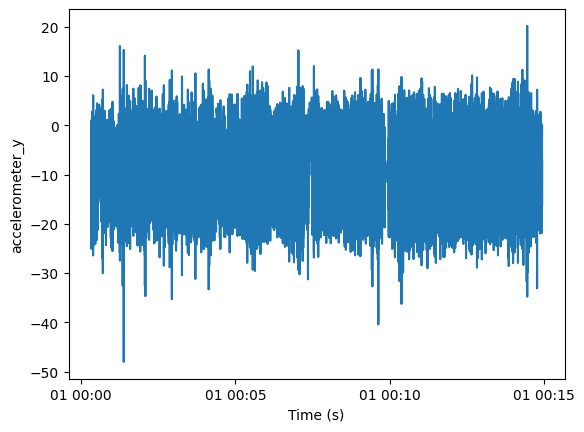

In [7]:
sns.lineplot(accelerometer_nick1['accelerometer_y'])

<Axes: xlabel='Time (s)', ylabel='accelerometer_y'>

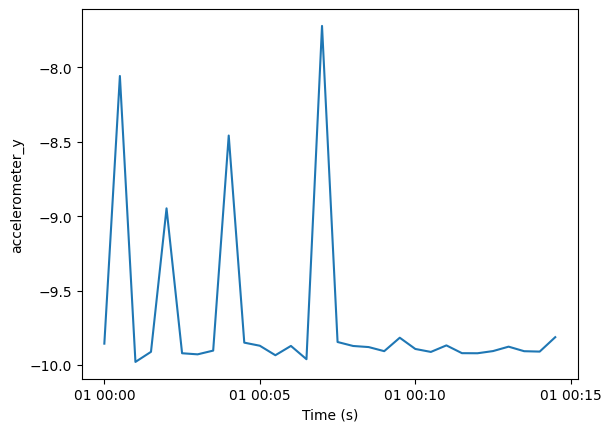

In [8]:
sns.lineplot(accelerometer_nick1_mean['accelerometer_y'])